# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [18]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [19]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [20]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

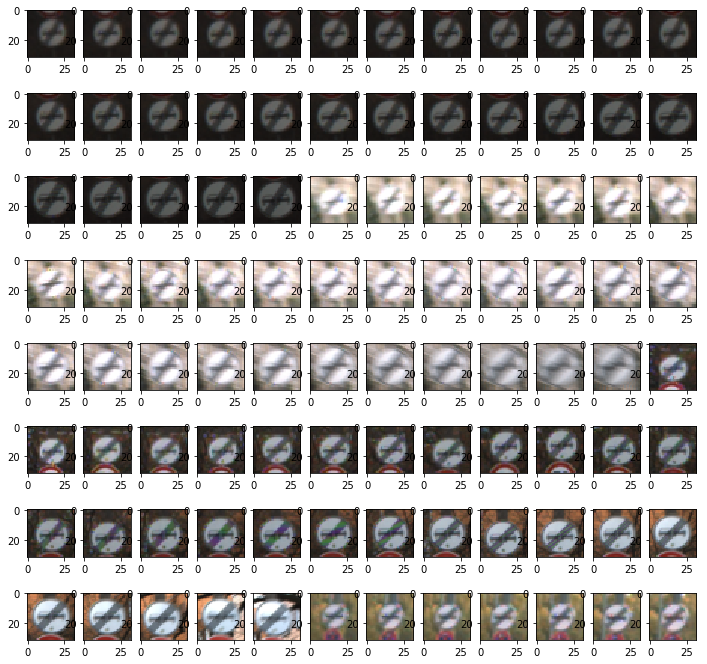

In [21]:
fig=plt.figure(figsize=(12, 12))
columns = 12
rows = 8
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [22]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import math
from scipy import ndimage
import cv2

def RandomTransform(image):
    randomNumber = np.random.randint(5, 15)
    image_transformed = ndimage.rotate(image, randomNumber, reshape=False)
    image_transformed_mirror = ndimage.rotate(image, -1*randomNumber, reshape=False)
    return image_transformed, image_transformed_mirror

def AugmentData(X_data, y_data):
    channel = X_data[0].shape[2]
    width = X_data[0].shape[1]
    height = X_data[0].shape[0]
    writtenImageCount = 0
    augmentedImages = []
    augmentedClasses = []
    a, class_counts = np.unique(y_data, return_counts=True)
    for currentClass in range(0, len(a), 1):
        currentClassCount = class_counts[currentClass]
        if currentClassCount < 1200:
            #print("Current class: {}".format(currentClass))
            #print("Current class count: {}".format(currentClassCount))
            #We need augment data for this class
            ratio = math.floor(1200.0 / float(currentClassCount))
            if ratio == 1:
                continue
            for x, y in zip(X_data, y_data):
                if y==currentClass:
                    curr_ratio = ratio
                    while(True):
                        transformed, transformed_mirror = RandomTransform(x)
#                         cv2.imwrite("/home/engin/Documents/tr_images/{}.pgm".format(writtenImageCount), transformed)
#                         cv2.imwrite("/home/engin/Documents/tr_images/{}.pgm".format(writtenImageCount+1), transformed_mirror)
                        augmentedImages.append(transformed)
                        augmentedClasses.append(currentClass)
                        augmentedImages.append(transformed_mirror)
                        augmentedClasses.append(currentClass)
                        curr_ratio = curr_ratio - 2
                        writtenImageCount = writtenImageCount + 2
                        if curr_ratio <= 0:
                            break

    y_data = np.append(y_data, augmentedClasses)
    X_data = np.append(X_data, augmentedImages).reshape((y_data.shape[0], width, height, channel))
    return  X_data, y_data

def SimplePreprocess(images):
    imagesCasted = images.astype(np.float32)
    imagesCasted = (imagesCasted - 128.0) / 128.0
    return imagesCasted

def SimplePreprocessGrayScale(images):
    #Convert to grayscale
    gray_images = np.dot(images[...,:3], [0.299, 0.587, 0.114])
    imagesCasted = SimplePreprocess(gray_images)
    return imagesCasted.reshape(imagesCasted.shape[0], imagesCasted.shape[1], imagesCasted.shape[2], 1)

def PreprocessData(preprocess_type, images):
    if preprocess_type == 1:
        #No preprocess, return original data
        return images
    elif preprocess_type == 2:
        #Simple preprocess specified in lecture note
        return SimplePreprocess(images)
    elif preprocess_type == 3:
        return SimplePreprocessGrayScale(images)
    else:
        print("Not a valid preprocess type is given...")
        return None
    

### Model Architecture

In [83]:
#This architecture is for colored images
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def FeedForward_LeNet_1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5,5,3,6], mean=mu, stddev=sigma), name="W1")
    b1 = tf.Variable(tf.zeros(6), name="b1")
    conv1 = tf.nn.conv2d(x, W1, [1,1,1,1], 'VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    #Activation.
    conv1 = tf.nn.relu(conv1)
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------

    #Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma), name="W2")
    b2 = tf.Variable(tf.zeros(16), name="b2")
    conv2 = tf.nn.conv2d(conv1, W2, [1,1,1,1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    #Activation.
    conv2 = tf.nn.relu(conv2)
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv2_flatten = flatten(conv2)
    
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(conv2_flatten, fc1_W) + fc1_b
    #Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


In [84]:
#This architecture is for colored images
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def FeedForward_LeNet_3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5,5,3,6], mean=mu, stddev=sigma), name="W1")
    b1 = tf.Variable(tf.zeros(6), name="b1")
    conv1 = tf.nn.conv2d(x, W1, [1,1,1,1], 'VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    #Activation.
    conv1 = tf.nn.relu(conv1)
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------

    #Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma), name="W2")
    b2 = tf.Variable(tf.zeros(16), name="b2")
    conv2 = tf.nn.conv2d(conv1, W2, [1,1,1,1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    #Activation.
    conv2 = tf.nn.relu(conv2)
    #---------------------
    
    #Layer 3: Convolutional. Output = 8x8x24.
    W3 = tf.Variable(tf.truncated_normal([3,3,16,24], mean=mu, stddev=sigma), name="W3")
    b3 = tf.Variable(tf.zeros(24), name="b3")
    conv3 = tf.nn.conv2d(conv2, W3, [1,1,1,1], 'VALID')
    conv3 = tf.nn.bias_add(conv3, b3)
    #Activation.
    conv3 = tf.nn.relu(conv3)
    #---------------------
    
    #Flatten. Input = 8x8x24. Output = 1536.
    conv2_flatten = flatten(conv3)
    
    
    #Layer 3: Fully Connected. Input = 1536. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1536, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(conv2_flatten, fc1_W) + fc1_b
    #Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [85]:
#This architecture is for colored images
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def FeedForward_LeNet_4(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5,5,3,6], mean=mu, stddev=sigma), name="W1")
    b1 = tf.Variable(tf.zeros(6), name="b1")
    conv1 = tf.nn.conv2d(x, W1, [1,1,1,1], 'VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    #Activation.
    conv1 = tf.nn.relu(conv1)
    #Add Drop out regularization
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------

    #Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma), name="W2")
    b2 = tf.Variable(tf.zeros(16), name="b2")
    conv2 = tf.nn.conv2d(conv1, W2, [1,1,1,1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    #Activation.
    conv2 = tf.nn.relu(conv2)
    #Add Drop out regularization
    conv2 = tf.nn.dropout(conv2, keep_prob)
    #---------------------
    
    #Layer 3: Convolutional. Output = 8x8x24.
    W3 = tf.Variable(tf.truncated_normal([3,3,16,24], mean=mu, stddev=sigma), name="W3")
    b3 = tf.Variable(tf.zeros(24), name="b3")
    conv3 = tf.nn.conv2d(conv2, W3, [1,1,1,1], 'VALID')
    conv3 = tf.nn.bias_add(conv3, b3)
    #Activation.
    conv3 = tf.nn.relu(conv3)
    #Add Drop out regularization
    conv3 = tf.nn.dropout(conv3, keep_prob)
    #---------------------
    
    #Flatten. Input = 8x8x24. Output = 1536.
    conv2_flatten = flatten(conv3)
    
    
    #Layer 3: Fully Connected. Input = 1536. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1536, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(conv2_flatten, fc1_W) + fc1_b
    #Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [86]:
#This architecture is for grayscale images
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def FeedForward_LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5,5,1,6], mean=mu, stddev=sigma), name="W1")
    b1 = tf.Variable(tf.zeros(6), name="b1")
    conv1 = tf.nn.conv2d(x, W1, [1,1,1,1], 'VALID')
    conv1 = tf.nn.bias_add(conv1, b1)
    #Activation.
    conv1 = tf.nn.relu(conv1)
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------

    #Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mean=mu, stddev=sigma), name="W2")
    b2 = tf.Variable(tf.zeros(16), name="b2")
    conv2 = tf.nn.conv2d(conv1, W2, [1,1,1,1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    #Activation.
    conv2 = tf.nn.relu(conv2)
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], 'VALID')
    #---------------------
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv2_flatten = flatten(conv2)
    
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(conv2_flatten, fc1_W) + fc1_b
    #Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [87]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Input
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)


#Feedforward
logits = FeedForward_LeNet_4(x, keep_prob)
#Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
#Loss
loss_operation = tf.reduce_mean(cross_entropy)
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

#Traffic Sign Classifier
classifier_operation = tf.nn.softmax(logits)
#topk_operation = tf.nn.top_k(classifier_operation, k=5)

#Evaluation Related variables
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


In [98]:
topk_operation = tf.nn.top_k(classifier_operation, k=5)

In [88]:
from sklearn.utils import shuffle

def TrainModel(X_train, y_train, X_valid, y_valid, epochs, batch_size, lrn_rate, config_name):
    validation_accuracies = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = X_train.shape[0]
    
        print("Training... with total number of examples:{}".format(num_examples))
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                #Offset takes values: 0, 0+batch_size, 0+2*batch_size, ..., (until)num_examples
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learning_rate: lrn_rate,
                                                       keep_prob: 0.5})

            validation_accuracy = EvaluateModel(X_valid, y_valid, batch_size)
            validation_accuracies.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, config_name)
        print("Model saved")
        
        return validation_accuracies

In [89]:
def EvaluateModel(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,
                                                          keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [90]:
def TestModel(X_test, y_test):
    with tf.Session() as sess:
        model_name = tf.train.latest_checkpoint('.')
        print("Using model file: {} for test.".format(model_name))
        saver.restore(sess, model_name)
        
        test_accuracy = EvaluateModel(X_test, y_test, 128)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [91]:
def ClassifyInput(image, model_path):
        with tf.Session() as sess:
            saver.restore(sess, model_path)
            print("Using model file: {} for recognition.".format(model_path))
            classifier_results = sess.run(classifier_operation, feed_dict={x: image, keep_prob: 1.0})
            results = np.argmax(classifier_results, axis=1)
            print("Input image is classified as: = {}".format(results))
            return results

In [92]:
def ClassifyInputTopK(image, model_path):
        with tf.Session() as sess:
            saver.restore(sess, model_path)
            print("Using model file: {} for recognition.".format(model_path))
            topk_results = sess.run(topk_operation, feed_dict={x: image, keep_prob: 1.0})
            return topk_results

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.663

EPOCH 2 ...
Validation Accuracy = 0.790

EPOCH 3 ...
Validation Accuracy = 0.840

EPOCH 4 ...
Validation Accuracy = 0.852

EPOCH 5 ...
Validation Accuracy = 0.863

EPOCH 6 ...
Validation Accuracy = 0.869

EPOCH 7 ...
Validation Accuracy = 0.881

EPOCH 8 ...
Validation Accuracy = 0.865

EPOCH 9 ...
Validation Accuracy = 0.880

EPOCH 10 ...
Validation Accuracy = 0.877

EPOCH 11 ...
Validation Accuracy = 0.879

EPOCH 12 ...
Validation Accuracy = 0.896

EPOCH 13 ...
Validation Accuracy = 0.873

EPOCH 14 ...
Validation Accuracy = 0.903

EPOCH 15 ...
Validation Accuracy = 0.902

EPOCH 16 ...
Validation Accuracy = 0.907

EPOCH 17 ...
Validation Accuracy = 0.902

EPOCH 18 ...
Validation Accuracy = 0.896

EPOCH 19 ...
Validation Accuracy = 0.892

EPOCH 20 ...
Validation Accuracy = 0.894

EPOCH 21 ...
Validation Accuracy = 0.897

EPOCH 22 ...
Validation Accuracy = 0.907

EPOCH 23 ...
Validation Accuracy = 0.

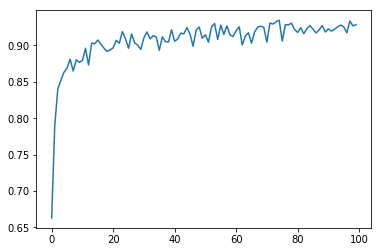

In [62]:
#This is the Configuration 1
###Properties of Configuration 1
### Data Preprocess: No
### Batch Size: 128
### Epoch Size: 100
### Learning Rate: 0.001
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(100,128, 0.001, './lenet_config1')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.443

EPOCH 2 ...
Validation Accuracy = 0.628

EPOCH 3 ...
Validation Accuracy = 0.706

EPOCH 4 ...
Validation Accuracy = 0.758

EPOCH 5 ...
Validation Accuracy = 0.793

EPOCH 6 ...
Validation Accuracy = 0.799

EPOCH 7 ...
Validation Accuracy = 0.810

EPOCH 8 ...
Validation Accuracy = 0.825

EPOCH 9 ...
Validation Accuracy = 0.827

EPOCH 10 ...
Validation Accuracy = 0.840

EPOCH 11 ...
Validation Accuracy = 0.825

EPOCH 12 ...
Validation Accuracy = 0.843

EPOCH 13 ...
Validation Accuracy = 0.843

EPOCH 14 ...
Validation Accuracy = 0.852

EPOCH 15 ...
Validation Accuracy = 0.851

EPOCH 16 ...
Validation Accuracy = 0.857

EPOCH 17 ...
Validation Accuracy = 0.855

EPOCH 18 ...
Validation Accuracy = 0.859

EPOCH 19 ...
Validation Accuracy = 0.855

EPOCH 20 ...
Validation Accuracy = 0.844

EPOCH 21 ...
Validation Accuracy = 0.868

EPOCH 22 ...
Validation Accuracy = 0.857

EPOCH 23 ...
Validation Accuracy = 0.

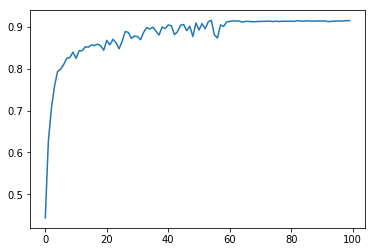

In [64]:
#This is the Configuration 2
###Properties of Configuration 2
### Data Preprocess: No
### Batch Size: 128
### Epoch Size: 100
### Learning Rate: 0.0005
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(100,128, 0.0005, './lenet_config2')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.506

EPOCH 2 ...
Validation Accuracy = 0.717

EPOCH 3 ...
Validation Accuracy = 0.784

EPOCH 4 ...
Validation Accuracy = 0.811

EPOCH 5 ...
Validation Accuracy = 0.820

EPOCH 6 ...
Validation Accuracy = 0.835

EPOCH 7 ...
Validation Accuracy = 0.835

EPOCH 8 ...
Validation Accuracy = 0.847

EPOCH 9 ...
Validation Accuracy = 0.851

EPOCH 10 ...
Validation Accuracy = 0.851

EPOCH 11 ...
Validation Accuracy = 0.851

EPOCH 12 ...
Validation Accuracy = 0.849

EPOCH 13 ...
Validation Accuracy = 0.863

EPOCH 14 ...
Validation Accuracy = 0.856

EPOCH 15 ...
Validation Accuracy = 0.863

EPOCH 16 ...
Validation Accuracy = 0.873

EPOCH 17 ...
Validation Accuracy = 0.871

EPOCH 18 ...
Validation Accuracy = 0.876

EPOCH 19 ...
Validation Accuracy = 0.880

EPOCH 20 ...
Validation Accuracy = 0.882

EPOCH 21 ...
Validation Accuracy = 0.889

EPOCH 22 ...
Validation Accuracy = 0.880

EPOCH 23 ...
Validation Accuracy = 0.

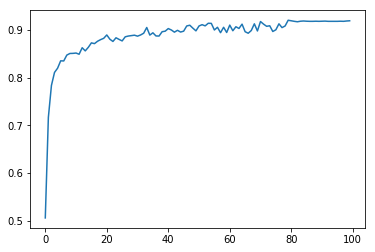

In [73]:
#This is the Configuration 3
###Properties of Configuration 3
### Data Preprocess: No
### Batch Size: 256
### Epoch Size: 100
### Learning Rate: 0.0010
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(100,256, 0.0010, './lenet_config3')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.357

EPOCH 2 ...
Validation Accuracy = 0.655

EPOCH 3 ...
Validation Accuracy = 0.757

EPOCH 4 ...
Validation Accuracy = 0.810

EPOCH 5 ...
Validation Accuracy = 0.825

EPOCH 6 ...
Validation Accuracy = 0.854

EPOCH 7 ...
Validation Accuracy = 0.860

EPOCH 8 ...
Validation Accuracy = 0.851

EPOCH 9 ...
Validation Accuracy = 0.870

EPOCH 10 ...
Validation Accuracy = 0.878

EPOCH 11 ...
Validation Accuracy = 0.870

EPOCH 12 ...
Validation Accuracy = 0.877

EPOCH 13 ...
Validation Accuracy = 0.888

EPOCH 14 ...
Validation Accuracy = 0.878

EPOCH 15 ...
Validation Accuracy = 0.888

EPOCH 16 ...
Validation Accuracy = 0.892

EPOCH 17 ...
Validation Accuracy = 0.881

EPOCH 18 ...
Validation Accuracy = 0.884

EPOCH 19 ...
Validation Accuracy = 0.885

EPOCH 20 ...
Validation Accuracy = 0.901

EPOCH 21 ...
Validation Accuracy = 0.893

EPOCH 22 ...
Validation Accuracy = 0.903

EPOCH 23 ...
Validation Accuracy = 0.

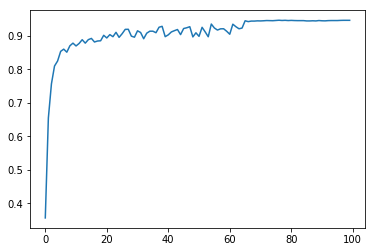

In [69]:
#This is the Configuration 4
###Properties of Configuration 4
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 100
### Learning Rate: 0.0010
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(100,512, 0.0010, './lenet_config4')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.478

EPOCH 2 ...
Validation Accuracy = 0.622

EPOCH 3 ...
Validation Accuracy = 0.745

EPOCH 4 ...
Validation Accuracy = 0.771

EPOCH 5 ...
Validation Accuracy = 0.812

EPOCH 6 ...
Validation Accuracy = 0.817

EPOCH 7 ...
Validation Accuracy = 0.829

EPOCH 8 ...
Validation Accuracy = 0.841

EPOCH 9 ...
Validation Accuracy = 0.850

EPOCH 10 ...
Validation Accuracy = 0.859

EPOCH 11 ...
Validation Accuracy = 0.862

EPOCH 12 ...
Validation Accuracy = 0.873

EPOCH 13 ...
Validation Accuracy = 0.867

EPOCH 14 ...
Validation Accuracy = 0.854

EPOCH 15 ...
Validation Accuracy = 0.868

EPOCH 16 ...
Validation Accuracy = 0.864

EPOCH 17 ...
Validation Accuracy = 0.875

EPOCH 18 ...
Validation Accuracy = 0.870

EPOCH 19 ...
Validation Accuracy = 0.876

EPOCH 20 ...
Validation Accuracy = 0.864

EPOCH 21 ...
Validation Accuracy = 0.876

EPOCH 22 ...
Validation Accuracy = 0.869

EPOCH 23 ...
Validation Accuracy = 0.

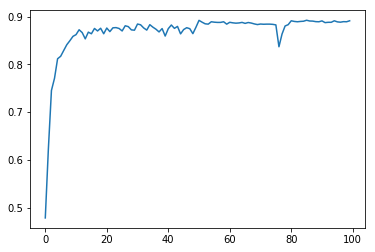

Using model file: ./lenet_config5 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config5
Test Accuracy = 0.905


In [82]:
#This is the Configuration 5
###Properties of Configuration 5
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 100
### Learning Rate: 0.0010
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train)
X_valid_preproc = PreprocessData(2, X_valid)
X_test_preproc = PreprocessData(2, X_test)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   100,512, 0.0010, './lenet_config5')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.324

EPOCH 2 ...
Validation Accuracy = 0.543

EPOCH 3 ...
Validation Accuracy = 0.659

EPOCH 4 ...
Validation Accuracy = 0.709

EPOCH 5 ...
Validation Accuracy = 0.770

EPOCH 6 ...
Validation Accuracy = 0.780

EPOCH 7 ...
Validation Accuracy = 0.808

EPOCH 8 ...
Validation Accuracy = 0.824

EPOCH 9 ...
Validation Accuracy = 0.818

EPOCH 10 ...
Validation Accuracy = 0.849

EPOCH 11 ...
Validation Accuracy = 0.844

EPOCH 12 ...
Validation Accuracy = 0.863

EPOCH 13 ...
Validation Accuracy = 0.861

EPOCH 14 ...
Validation Accuracy = 0.868

EPOCH 15 ...
Validation Accuracy = 0.878

EPOCH 16 ...
Validation Accuracy = 0.866

EPOCH 17 ...
Validation Accuracy = 0.871

EPOCH 18 ...
Validation Accuracy = 0.871

EPOCH 19 ...
Validation Accuracy = 0.888

EPOCH 20 ...
Validation Accuracy = 0.881

EPOCH 21 ...
Validation Accuracy = 0.892

EPOCH 22 ...
Validation Accuracy = 0.881

EPOCH 23 ...
Validation Accuracy = 0.

EPOCH 193 ...
Validation Accuracy = 0.887

EPOCH 194 ...
Validation Accuracy = 0.918

EPOCH 195 ...
Validation Accuracy = 0.918

EPOCH 196 ...
Validation Accuracy = 0.920

EPOCH 197 ...
Validation Accuracy = 0.921

EPOCH 198 ...
Validation Accuracy = 0.924

EPOCH 199 ...
Validation Accuracy = 0.924

EPOCH 200 ...
Validation Accuracy = 0.923

Model saved
size: 200


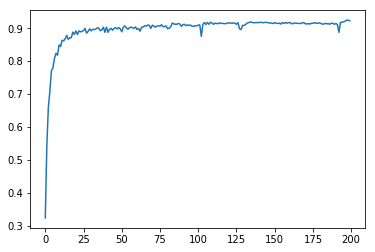

Using model file: ./lenet_config6 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config6
Test Accuracy = 0.911


In [86]:
#This is the Configuration 6
###Properties of Configuration 6
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0005
### Loss Function: Cross Entropy Loss
### Network Architecture: 1

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train)
X_valid_preproc = PreprocessData(2, X_valid)
X_test_preproc = PreprocessData(2, X_test)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.0005, './lenet_config6')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.158

EPOCH 2 ...
Validation Accuracy = 0.406

EPOCH 3 ...
Validation Accuracy = 0.607

EPOCH 4 ...
Validation Accuracy = 0.680

EPOCH 5 ...
Validation Accuracy = 0.725

EPOCH 6 ...
Validation Accuracy = 0.763

EPOCH 7 ...
Validation Accuracy = 0.794

EPOCH 8 ...
Validation Accuracy = 0.822

EPOCH 9 ...
Validation Accuracy = 0.824

EPOCH 10 ...
Validation Accuracy = 0.829

EPOCH 11 ...
Validation Accuracy = 0.846

EPOCH 12 ...
Validation Accuracy = 0.857

EPOCH 13 ...
Validation Accuracy = 0.858

EPOCH 14 ...
Validation Accuracy = 0.860

EPOCH 15 ...
Validation Accuracy = 0.869

EPOCH 16 ...
Validation Accuracy = 0.860

EPOCH 17 ...
Validation Accuracy = 0.856

EPOCH 18 ...
Validation Accuracy = 0.871

EPOCH 19 ...
Validation Accuracy = 0.879

EPOCH 20 ...
Validation Accuracy = 0.870

EPOCH 21 ...
Validation Accuracy = 0.867

EPOCH 22 ...
Validation Accuracy = 0.876

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.921

EPOCH 194 ...
Validation Accuracy = 0.920

EPOCH 195 ...
Validation Accuracy = 0.922

EPOCH 196 ...
Validation Accuracy = 0.921

EPOCH 197 ...
Validation Accuracy = 0.921

EPOCH 198 ...
Validation Accuracy = 0.921

EPOCH 199 ...
Validation Accuracy = 0.922

EPOCH 200 ...
Validation Accuracy = 0.920

Model saved
size: 200


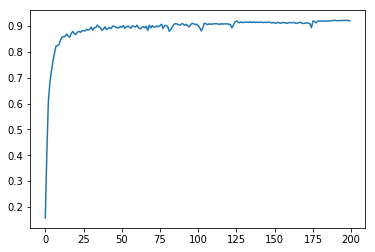

Using model file: ./lenet_config7 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config7
Test Accuracy = 0.902


In [97]:
#This is the Configuration 7
###Properties of Configuration 7
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0005
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.0005, './lenet_config7')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.086

EPOCH 2 ...
Validation Accuracy = 0.182

EPOCH 3 ...
Validation Accuracy = 0.247

EPOCH 4 ...
Validation Accuracy = 0.363

EPOCH 5 ...
Validation Accuracy = 0.419

EPOCH 6 ...
Validation Accuracy = 0.490

EPOCH 7 ...
Validation Accuracy = 0.545

EPOCH 8 ...
Validation Accuracy = 0.563

EPOCH 9 ...
Validation Accuracy = 0.594

EPOCH 10 ...
Validation Accuracy = 0.629

EPOCH 11 ...
Validation Accuracy = 0.661

EPOCH 12 ...
Validation Accuracy = 0.677

EPOCH 13 ...
Validation Accuracy = 0.690

EPOCH 14 ...
Validation Accuracy = 0.702

EPOCH 15 ...
Validation Accuracy = 0.715

EPOCH 16 ...
Validation Accuracy = 0.725

EPOCH 17 ...
Validation Accuracy = 0.728

EPOCH 18 ...
Validation Accuracy = 0.735

EPOCH 19 ...
Validation Accuracy = 0.743

EPOCH 20 ...
Validation Accuracy = 0.754

EPOCH 21 ...
Validation Accuracy = 0.754

EPOCH 22 ...
Validation Accuracy = 0.754

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.861

EPOCH 194 ...
Validation Accuracy = 0.860

EPOCH 195 ...
Validation Accuracy = 0.857

EPOCH 196 ...
Validation Accuracy = 0.863

EPOCH 197 ...
Validation Accuracy = 0.862

EPOCH 198 ...
Validation Accuracy = 0.861

EPOCH 199 ...
Validation Accuracy = 0.862

EPOCH 200 ...
Validation Accuracy = 0.857

Model saved
size: 200


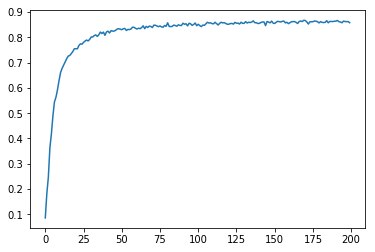

Using model file: ./lenet_config8 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config8
Test Accuracy = 0.867


In [98]:
#This is the Configuration 8
###Properties of Configuration 8
### Data Preprocess: No
### Batch Size: 256
### Epoch Size: 200
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,256, 0.0001, './lenet_config8')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.130

EPOCH 2 ...
Validation Accuracy = 0.261

EPOCH 3 ...
Validation Accuracy = 0.393

EPOCH 4 ...
Validation Accuracy = 0.527

EPOCH 5 ...
Validation Accuracy = 0.602

EPOCH 6 ...
Validation Accuracy = 0.664

EPOCH 7 ...
Validation Accuracy = 0.698

EPOCH 8 ...
Validation Accuracy = 0.743

EPOCH 9 ...
Validation Accuracy = 0.765

EPOCH 10 ...
Validation Accuracy = 0.759

EPOCH 11 ...
Validation Accuracy = 0.782

EPOCH 12 ...
Validation Accuracy = 0.795

EPOCH 13 ...
Validation Accuracy = 0.805

EPOCH 14 ...
Validation Accuracy = 0.801

EPOCH 15 ...
Validation Accuracy = 0.813

EPOCH 16 ...
Validation Accuracy = 0.817

EPOCH 17 ...
Validation Accuracy = 0.830

EPOCH 18 ...
Validation Accuracy = 0.840

EPOCH 19 ...
Validation Accuracy = 0.842

EPOCH 20 ...
Validation Accuracy = 0.842

EPOCH 21 ...
Validation Accuracy = 0.840

EPOCH 22 ...
Validation Accuracy = 0.839

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.892

EPOCH 194 ...
Validation Accuracy = 0.894

EPOCH 195 ...
Validation Accuracy = 0.890

EPOCH 196 ...
Validation Accuracy = 0.893

EPOCH 197 ...
Validation Accuracy = 0.891

EPOCH 198 ...
Validation Accuracy = 0.886

EPOCH 199 ...
Validation Accuracy = 0.890

EPOCH 200 ...
Validation Accuracy = 0.891

EPOCH 201 ...
Validation Accuracy = 0.889

EPOCH 202 ...
Validation Accuracy = 0.892

EPOCH 203 ...
Validation Accuracy = 0.888

EPOCH 204 ...
Validation Accuracy = 0.887

EPOCH 205 ...
Validation Accuracy = 0.890

EPOCH 206 ...
Validation Accuracy = 0.888

EPOCH 207 ...
Validation Accuracy = 0.888

EPOCH 208 ...
Validation Accuracy = 0.889

EPOCH 209 ...
Validation Accuracy = 0.888

EPOCH 210 ...
Validation Accuracy = 0.885

EPOCH 211 ...
Validation Accuracy = 0.894

EPOCH 212 ...
Validation Accuracy = 0.888

EPOCH 213 ...
Validation Accuracy = 0.885

EPOCH 214 ...
Validation Accuracy = 0.888

EPOCH 215 ...
Validation Accuracy = 0.885

EPOCH 216 .

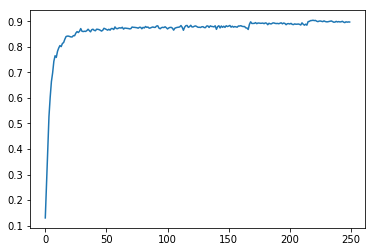

Using model file: ./lenet_config9 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config9
Test Accuracy = 0.893


In [100]:
#This is the Configuration 9
###Properties of Configuration 9
### Data Preprocess: No
### Batch Size: 1024
### Epoch Size: 250
### Learning Rate: 0.0005
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   250,1024, 0.0005, './lenet_config9')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.034

EPOCH 2 ...
Validation Accuracy = 0.053

EPOCH 3 ...
Validation Accuracy = 0.107

EPOCH 4 ...
Validation Accuracy = 0.157

EPOCH 5 ...
Validation Accuracy = 0.181

EPOCH 6 ...
Validation Accuracy = 0.200

EPOCH 7 ...
Validation Accuracy = 0.241

EPOCH 8 ...
Validation Accuracy = 0.267

EPOCH 9 ...
Validation Accuracy = 0.309

EPOCH 10 ...
Validation Accuracy = 0.340

EPOCH 11 ...
Validation Accuracy = 0.380

EPOCH 12 ...
Validation Accuracy = 0.431

EPOCH 13 ...
Validation Accuracy = 0.440

EPOCH 14 ...
Validation Accuracy = 0.485

EPOCH 15 ...
Validation Accuracy = 0.500

EPOCH 16 ...
Validation Accuracy = 0.536

EPOCH 17 ...
Validation Accuracy = 0.555

EPOCH 18 ...
Validation Accuracy = 0.578

EPOCH 19 ...
Validation Accuracy = 0.593

EPOCH 20 ...
Validation Accuracy = 0.617

EPOCH 21 ...
Validation Accuracy = 0.626

EPOCH 22 ...
Validation Accuracy = 0.638

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.879

EPOCH 194 ...
Validation Accuracy = 0.881

EPOCH 195 ...
Validation Accuracy = 0.876

EPOCH 196 ...
Validation Accuracy = 0.875

EPOCH 197 ...
Validation Accuracy = 0.879

EPOCH 198 ...
Validation Accuracy = 0.879

EPOCH 199 ...
Validation Accuracy = 0.875

EPOCH 200 ...
Validation Accuracy = 0.873

EPOCH 201 ...
Validation Accuracy = 0.879

EPOCH 202 ...
Validation Accuracy = 0.876

EPOCH 203 ...
Validation Accuracy = 0.880

EPOCH 204 ...
Validation Accuracy = 0.877

EPOCH 205 ...
Validation Accuracy = 0.879

EPOCH 206 ...
Validation Accuracy = 0.878

EPOCH 207 ...
Validation Accuracy = 0.877

EPOCH 208 ...
Validation Accuracy = 0.873

EPOCH 209 ...
Validation Accuracy = 0.880

EPOCH 210 ...
Validation Accuracy = 0.880

EPOCH 211 ...
Validation Accuracy = 0.880

EPOCH 212 ...
Validation Accuracy = 0.875

EPOCH 213 ...
Validation Accuracy = 0.880

EPOCH 214 ...
Validation Accuracy = 0.878

EPOCH 215 ...
Validation Accuracy = 0.877

EPOCH 216 .

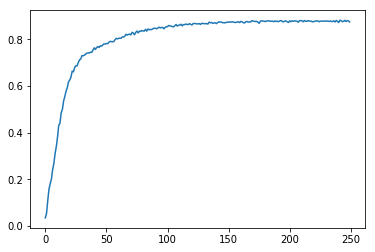

Using model file: ./lenet_config10 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config10
Test Accuracy = 0.878


In [101]:
#This is the Configuration 10
###Properties of Configuration 10
### Data Preprocess: No
### Batch Size: 1024
### Epoch Size: 250
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   250,1024, 0.0001, './lenet_config10')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.067

EPOCH 2 ...
Validation Accuracy = 0.114

EPOCH 3 ...
Validation Accuracy = 0.166

EPOCH 4 ...
Validation Accuracy = 0.218

EPOCH 5 ...
Validation Accuracy = 0.274

EPOCH 6 ...
Validation Accuracy = 0.329

EPOCH 7 ...
Validation Accuracy = 0.395

EPOCH 8 ...
Validation Accuracy = 0.439

EPOCH 9 ...
Validation Accuracy = 0.453

EPOCH 10 ...
Validation Accuracy = 0.503

EPOCH 11 ...
Validation Accuracy = 0.533

EPOCH 12 ...
Validation Accuracy = 0.553

EPOCH 13 ...
Validation Accuracy = 0.592

EPOCH 14 ...
Validation Accuracy = 0.602

EPOCH 15 ...
Validation Accuracy = 0.641

EPOCH 16 ...
Validation Accuracy = 0.673

EPOCH 17 ...
Validation Accuracy = 0.684

EPOCH 18 ...
Validation Accuracy = 0.704

EPOCH 19 ...
Validation Accuracy = 0.707

EPOCH 20 ...
Validation Accuracy = 0.716

EPOCH 21 ...
Validation Accuracy = 0.715

EPOCH 22 ...
Validation Accuracy = 0.732

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.874

EPOCH 194 ...
Validation Accuracy = 0.878

EPOCH 195 ...
Validation Accuracy = 0.871

EPOCH 196 ...
Validation Accuracy = 0.875

EPOCH 197 ...
Validation Accuracy = 0.880

EPOCH 198 ...
Validation Accuracy = 0.875

EPOCH 199 ...
Validation Accuracy = 0.876

EPOCH 200 ...
Validation Accuracy = 0.873

Model saved
size: 200


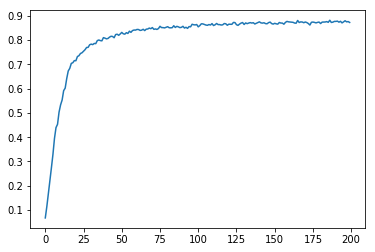

Using model file: ./lenet_config11 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config11
Test Accuracy = 0.876


In [102]:
#This is the Configuration 11
###Properties of Configuration 11
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.0001, './lenet_config11')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(34799, 32, 32, 1)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.050

EPOCH 2 ...
Validation Accuracy = 0.128

EPOCH 3 ...
Validation Accuracy = 0.176

EPOCH 4 ...
Validation Accuracy = 0.223

EPOCH 5 ...
Validation Accuracy = 0.278

EPOCH 6 ...
Validation Accuracy = 0.342

EPOCH 7 ...
Validation Accuracy = 0.417

EPOCH 8 ...
Validation Accuracy = 0.460

EPOCH 9 ...
Validation Accuracy = 0.500

EPOCH 10 ...
Validation Accuracy = 0.564

EPOCH 11 ...
Validation Accuracy = 0.594

EPOCH 12 ...
Validation Accuracy = 0.636

EPOCH 13 ...
Validation Accuracy = 0.642

EPOCH 14 ...
Validation Accuracy = 0.677

EPOCH 15 ...
Validation Accuracy = 0.693

EPOCH 16 ...
Validation Accuracy = 0.698

EPOCH 17 ...
Validation Accuracy = 0.707

EPOCH 18 ...
Validation Accuracy = 0.728

EPOCH 19 ...
Validation Accuracy = 0.724

EPOCH 20 ...
Validation Accuracy = 0.744

EPOCH 21 ...
Validation Accuracy = 0.749

EPOCH 22 ...
Validation Accuracy = 0.756

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.865

EPOCH 194 ...
Validation Accuracy = 0.869

EPOCH 195 ...
Validation Accuracy = 0.871

EPOCH 196 ...
Validation Accuracy = 0.872

EPOCH 197 ...
Validation Accuracy = 0.868

EPOCH 198 ...
Validation Accuracy = 0.870

EPOCH 199 ...
Validation Accuracy = 0.867

EPOCH 200 ...
Validation Accuracy = 0.873

Model saved
size: 200


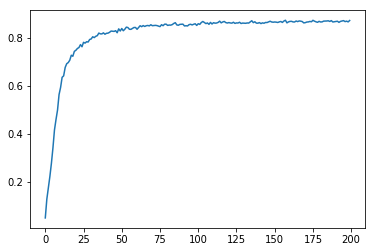

Using model file: ./lenet_config12 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config12
Test Accuracy = 0.879


In [109]:
#This is the Configuration 12
###Properties of Configuration 12
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.0001, './lenet_config12')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(64257, 32, 32, 1)
Training... with total number of examples:64257
EPOCH 1 ...
Validation Accuracy = 0.054

EPOCH 2 ...
Validation Accuracy = 0.166

EPOCH 3 ...
Validation Accuracy = 0.321

EPOCH 4 ...
Validation Accuracy = 0.438

EPOCH 5 ...
Validation Accuracy = 0.505

EPOCH 6 ...
Validation Accuracy = 0.557

EPOCH 7 ...
Validation Accuracy = 0.610

EPOCH 8 ...
Validation Accuracy = 0.624

EPOCH 9 ...
Validation Accuracy = 0.656

EPOCH 10 ...
Validation Accuracy = 0.680

EPOCH 11 ...
Validation Accuracy = 0.694

EPOCH 12 ...
Validation Accuracy = 0.712

EPOCH 13 ...
Validation Accuracy = 0.728

EPOCH 14 ...
Validation Accuracy = 0.731

EPOCH 15 ...
Validation Accuracy = 0.737

EPOCH 16 ...
Validation Accuracy = 0.760

EPOCH 17 ...
Validation Accuracy = 0.768

EPOCH 18 ...
Validation Accuracy = 0.776

EPOCH 19 ...
Validation Accuracy = 0.772

EPOCH 20 ...
Validation Accuracy = 0.780

EPOCH 21 ...
Validation Accuracy = 0.795

EPOCH 22 ...
Validation Accuracy = 0.794

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.885

EPOCH 194 ...
Validation Accuracy = 0.881

EPOCH 195 ...
Validation Accuracy = 0.874

EPOCH 196 ...
Validation Accuracy = 0.888

EPOCH 197 ...
Validation Accuracy = 0.881

EPOCH 198 ...
Validation Accuracy = 0.881

EPOCH 199 ...
Validation Accuracy = 0.886

EPOCH 200 ...
Validation Accuracy = 0.884

Model saved
size: 200


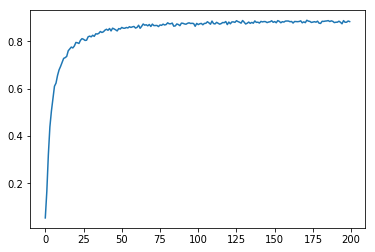

Using model file: ./lenet_config13 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config13
Test Accuracy = 0.877


In [110]:
#This is the Configuration 13
###Properties of Configuration 13
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 2

#Augment data
X_train_augmented, y_train_augmented = AugmentData(X_train, y_train)

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(3, X_train_augmented)
X_valid_preproc = PreprocessData(3, X_valid)
X_test_preproc = PreprocessData(3, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train_augmented, X_valid_preproc, y_valid, 
                                   200,512, 0.0001, './lenet_config13')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy
TestModel(X_test_preproc, y_test)

(64257, 32, 32, 3)
Training... with total number of examples:64257
EPOCH 1 ...
Validation Accuracy = 0.293

EPOCH 2 ...
Validation Accuracy = 0.480

EPOCH 3 ...
Validation Accuracy = 0.558

EPOCH 4 ...
Validation Accuracy = 0.631

EPOCH 5 ...
Validation Accuracy = 0.650

EPOCH 6 ...
Validation Accuracy = 0.673

EPOCH 7 ...
Validation Accuracy = 0.691

EPOCH 8 ...
Validation Accuracy = 0.703

EPOCH 9 ...
Validation Accuracy = 0.716

EPOCH 10 ...
Validation Accuracy = 0.716

EPOCH 11 ...
Validation Accuracy = 0.721

EPOCH 12 ...
Validation Accuracy = 0.728

EPOCH 13 ...
Validation Accuracy = 0.738

EPOCH 14 ...
Validation Accuracy = 0.748

EPOCH 15 ...
Validation Accuracy = 0.748

EPOCH 16 ...
Validation Accuracy = 0.765

EPOCH 17 ...
Validation Accuracy = 0.767

EPOCH 18 ...
Validation Accuracy = 0.770

EPOCH 19 ...
Validation Accuracy = 0.769

EPOCH 20 ...
Validation Accuracy = 0.776

EPOCH 21 ...
Validation Accuracy = 0.781

EPOCH 22 ...
Validation Accuracy = 0.771

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.840

EPOCH 194 ...
Validation Accuracy = 0.838

EPOCH 195 ...
Validation Accuracy = 0.839

EPOCH 196 ...
Validation Accuracy = 0.839

EPOCH 197 ...
Validation Accuracy = 0.838

EPOCH 198 ...
Validation Accuracy = 0.840

EPOCH 199 ...
Validation Accuracy = 0.837

EPOCH 200 ...
Validation Accuracy = 0.840

Model saved
size: 200


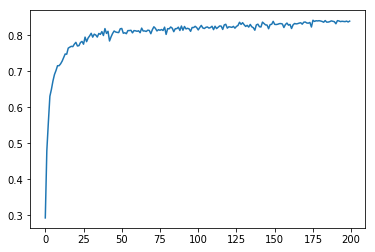

Using model file: ./lenet_config14 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config14
Test Accuracy = 0.895


In [127]:
#This is the Configuration 14
###Properties of Configuration 14
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.0001
### Loss Function: Cross Entropy Loss
### Network Architecture: 3

#Augment data
X_train_augmented, y_train_augmented = AugmentData(X_train, y_train)
X_valid_augmented, y_valid_augmented = AugmentData(X_valid, y_valid)

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train_augmented)
X_valid_preproc = PreprocessData(2, X_valid_augmented)
X_test_preproc = PreprocessData(2, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train_augmented, X_valid_preproc, y_valid_augmented, 
                                   200,512, 0.0001, './lenet_config14')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy

TestModel(X_test_preproc, y_test)

(34799, 32, 32, 3)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.626

EPOCH 2 ...
Validation Accuracy = 0.778

EPOCH 3 ...
Validation Accuracy = 0.848

EPOCH 4 ...
Validation Accuracy = 0.868

EPOCH 5 ...
Validation Accuracy = 0.890

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 7 ...
Validation Accuracy = 0.889

EPOCH 8 ...
Validation Accuracy = 0.887

EPOCH 9 ...
Validation Accuracy = 0.900

EPOCH 10 ...
Validation Accuracy = 0.887

EPOCH 11 ...
Validation Accuracy = 0.893

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 13 ...
Validation Accuracy = 0.903

EPOCH 14 ...
Validation Accuracy = 0.910

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.911

EPOCH 17 ...
Validation Accuracy = 0.910

EPOCH 18 ...
Validation Accuracy = 0.905

EPOCH 19 ...
Validation Accuracy = 0.905

EPOCH 20 ...
Validation Accuracy = 0.906

EPOCH 21 ...
Validation Accuracy = 0.906

EPOCH 22 ...
Validation Accuracy = 0.910

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.939

EPOCH 194 ...
Validation Accuracy = 0.938

EPOCH 195 ...
Validation Accuracy = 0.938

EPOCH 196 ...
Validation Accuracy = 0.937

EPOCH 197 ...
Validation Accuracy = 0.938

EPOCH 198 ...
Validation Accuracy = 0.938

EPOCH 199 ...
Validation Accuracy = 0.939

EPOCH 200 ...
Validation Accuracy = 0.939

Model saved
size: 200


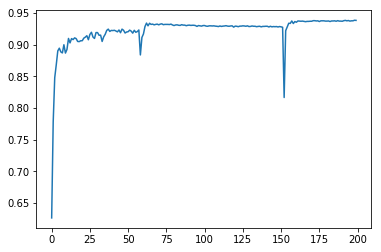

Using model file: ./lenet_config15 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config15
Test Accuracy = 0.920


In [129]:
#This is the Configuration 15
###Properties of Configuration 15
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.001
### Loss Function: Cross Entropy Loss
### Network Architecture: 3


#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train)
X_valid_preproc = PreprocessData(2, X_valid)
X_test_preproc = PreprocessData(2, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.001, './lenet_config15')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy

TestModel(X_test_preproc, y_test)

(34799, 32, 32, 3)
Training... with total number of examples:34799
EPOCH 1 ...
Validation Accuracy = 0.458

EPOCH 2 ...
Validation Accuracy = 0.749

EPOCH 3 ...
Validation Accuracy = 0.835

EPOCH 4 ...
Validation Accuracy = 0.862

EPOCH 5 ...
Validation Accuracy = 0.871

EPOCH 6 ...
Validation Accuracy = 0.894

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.938

EPOCH 17 ...
Validation Accuracy = 0.940

EPOCH 18 ...
Validation Accuracy = 0.943

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.946

EPOCH 21 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.965

EPOCH 194 ...
Validation Accuracy = 0.963

EPOCH 195 ...
Validation Accuracy = 0.960

EPOCH 196 ...
Validation Accuracy = 0.967

EPOCH 197 ...
Validation Accuracy = 0.966

EPOCH 198 ...
Validation Accuracy = 0.961

EPOCH 199 ...
Validation Accuracy = 0.961

EPOCH 200 ...
Validation Accuracy = 0.969

Model saved
size: 200


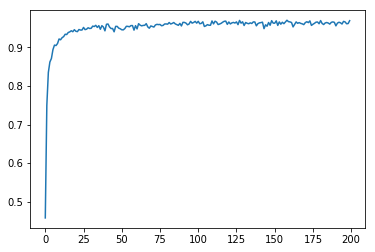

Using model file: ./lenet_config16 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config16
Test Accuracy = 0.950


In [134]:
#This is the Configuration 16
###Properties of Configuration 16
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.001
### Loss Function: Cross Entropy Loss
### Network Architecture: 4


#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train)
X_valid_preproc = PreprocessData(2, X_valid)
X_test_preproc = PreprocessData(2, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train, X_valid_preproc, y_valid, 
                                   200,512, 0.001, './lenet_config16')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy

TestModel(X_test_preproc, y_test)

(64257, 32, 32, 3)
Training... with total number of examples:64257
EPOCH 1 ...
Validation Accuracy = 0.566

EPOCH 2 ...
Validation Accuracy = 0.769

EPOCH 3 ...
Validation Accuracy = 0.816

EPOCH 4 ...
Validation Accuracy = 0.819

EPOCH 5 ...
Validation Accuracy = 0.851

EPOCH 6 ...
Validation Accuracy = 0.858

EPOCH 7 ...
Validation Accuracy = 0.863

EPOCH 8 ...
Validation Accuracy = 0.855

EPOCH 9 ...
Validation Accuracy = 0.858

EPOCH 10 ...
Validation Accuracy = 0.862

EPOCH 11 ...
Validation Accuracy = 0.875

EPOCH 12 ...
Validation Accuracy = 0.885

EPOCH 13 ...
Validation Accuracy = 0.877

EPOCH 14 ...
Validation Accuracy = 0.864

EPOCH 15 ...
Validation Accuracy = 0.890

EPOCH 16 ...
Validation Accuracy = 0.873

EPOCH 17 ...
Validation Accuracy = 0.894

EPOCH 18 ...
Validation Accuracy = 0.897

EPOCH 19 ...
Validation Accuracy = 0.896

EPOCH 20 ...
Validation Accuracy = 0.879

EPOCH 21 ...
Validation Accuracy = 0.891

EPOCH 22 ...
Validation Accuracy = 0.893

EPOCH 23 ...
Valid

EPOCH 193 ...
Validation Accuracy = 0.913

EPOCH 194 ...
Validation Accuracy = 0.902

EPOCH 195 ...
Validation Accuracy = 0.917

EPOCH 196 ...
Validation Accuracy = 0.901

EPOCH 197 ...
Validation Accuracy = 0.909

EPOCH 198 ...
Validation Accuracy = 0.904

EPOCH 199 ...
Validation Accuracy = 0.905

EPOCH 200 ...
Validation Accuracy = 0.899

Model saved
size: 200


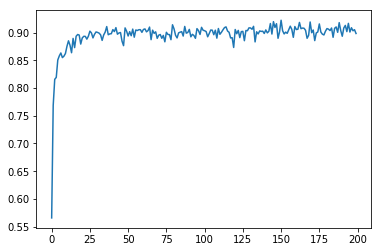

Using model file: ./lenet_config17 for test.
INFO:tensorflow:Restoring parameters from ./lenet_config17
Test Accuracy = 0.942


In [101]:
#This is the Configuration 17
###Properties of Configuration 17
### Data Preprocess: No
### Batch Size: 512
### Epoch Size: 200
### Learning Rate: 0.001
### Loss Function: Cross Entropy Loss
### Network Architecture: 4

#Augment data
X_train_augmented, y_train_augmented = AugmentData(X_train, y_train)
X_valid_augmented, y_valid_augmented = AugmentData(X_valid, y_valid)

#Preprocess data
#Apply simple preprocess on data
X_train_preproc = PreprocessData(2, X_train_augmented)
X_valid_preproc = PreprocessData(2, X_valid_augmented)
X_test_preproc = PreprocessData(2, X_test)
print(X_train_preproc.shape)

#Call the train model function and get the validation accuracies for epochs
validation_accuracies = TrainModel(X_train_preproc, y_train_augmented, X_valid_preproc, y_valid_augmented, 
                                   200,512, 0.001, './lenet_config17')
print ("size: {}".format(len(validation_accuracies)))

#Plot the accuracies per epoch
plt.plot(validation_accuracies)
plt.show()

#Finally evaluate saved model on test dataset
#Test the model with unseen data, print the accuracy

TestModel(X_test_preproc, y_test)


### Load and Output the Images

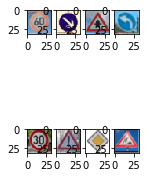

In [5]:
import cv2
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
images = []
for i in range(1,9):
    image = cv2.imread("./new_data/{}.png".format(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    
fig=plt.figure(figsize=(2, 4))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
plt.show()

### Predict the Sign Type for Each Image

In [94]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
ClassifyInput(images, "./lenet_config18")

INFO:tensorflow:Restoring parameters from ./lenet_config18
Using model file: ./lenet_config18 for recognition.
Input image is classified as: = [ 3 38 11 34  1 18 12 25]


array([ 3, 38, 11, 34,  1, 18, 12, 25])

### Analyze Performance

In [96]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#We have the following class labels, one-hot encoded
test_results = [3,38,11,34,1,18,12,25]
output_test_results = ClassifyInput(images, "./lenet_config18")
total_correct = 0
for i in range(0, len(test_results)):
    if test_results[i] == output_test_results[i]:
        total_correct = total_correct + 1
accuracy = float(total_correct) / float(len(test_results))
print("Test result accuracy: {}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_config18
Using model file: ./lenet_config18 for recognition.
Input image is classified as: = [ 3 38 11 34  1 18 12 25]
Test result accuracy: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [100]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

output_topk_results = ClassifyInputTopK(images, "./lenet_config18")
print(output_topk_results)

INFO:tensorflow:Restoring parameters from ./lenet_config18
Using model file: ./lenet_config18 for recognition.
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[ 3,  0,  1,  2,  4],
       [38,  0,  1,  2,  3],
       [11,  0,  1,  2,  3],
       [34,  0,  1,  2,  3],
       [ 1,  0,  2,  3,  4],
       [18,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [25,  0,  1,  2,  3]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")